In [ ]:
import cv2
import numpy as np
import glob
import pickle
from sklearn.externals import joblib
from keras.applications.vgg16 import preprocess_input
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import glob
import keras
from keras.models import Model
from keras.applications.densenet import DenseNet121
from keras.applications.vgg16 import VGG16
from keras.applications.densenet import DenseNet121
from keras.models import Model
import glob

In [ ]:
!unzip /content/CASIA-Iris-Thousand.zip

Archive:  /content/CASIA-Iris-Thousand.zip
replace CASIA-Iris-Thousand/000/L/S5000L00.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace CASIA-Iris-Thousand/000/L/S5000L01.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: CASIA-Iris-Thousand/000/L/S5000L01.jpg  
  inflating: CASIA-Iris-Thousand/000/L/S5000L02.jpg  
  inflating: CASIA-Iris-Thousand/000/L/S5000L03.jpg  
  inflating: CASIA-Iris-Thousand/000/L/S5000L04.jpg  
  inflating: CASIA-Iris-Thousand/000/L/S5000L05.jpg  
  inflating: CASIA-Iris-Thousand/000/L/S5000L06.jpg  
  inflating: CASIA-Iris-Thousand/000/L/S5000L07.jpg  
  inflating: CASIA-Iris-Thousand/000/L/S5000L08.jpg  
  inflating: CASIA-Iris-Thousand/000/L/S5000L09.jpg  
  inflating: CASIA-Iris-Thousand/000/R/S5000R00.jpg  
  inflating: CASIA-Iris-Thousand/000/R/S5000R01.jpg  
  inflating: CASIA-Iris-Thousand/000/R/S5000R02.jpg  
  inflating: CASIA-Iris-Thousand/000/R/S5000R03.jpg  
  inflating: CASIA-Iris-Thousand/000/R/S5000R04.jpg  
  inflating: CASIA-Iris-T

In [ ]:
imgs=[]
final_output_84_84=[]
lables=[]
# path=''
for filepath in glob.iglob('/content/CASIA-Iris-Thousand/*'):   
  print(filepath)
  for filefilepath1 in glob.iglob(filepath+'/*'):
    print(filefilepath1)
    for filefilepath in glob.iglob(filefilepath1+'/*'):
      if filefilepath[-1] == 'g':
        img	= cv2.imread(filefilepath)
        imgs_colored=cv2.imread(filefilepath)
        #img=cv2.resize(img,(200,150))
        #imgs_colored.append(img)

        # print(filefilepath)
        # print(filefilepath[-12:-4])
        #print(filefilepath[-5])
        split = filefilepath.split(".")
        #print(split)
        # print(split[0][12:])
        # print(split[1])

        label=split[0][-6:-3]
        print(label)
        example_number = split[1]
        imgs.append([imgs_colored,int(label)])
        #final_output_84_84.append(imgs_colored)
        #lables.append(int(label))
    
import random

random.shuffle(imgs)

for i,j in imgs:
        final_output_84_84.append(i)
        lables.append(j)
    
print(len(final_output_84_84))
print(len(lables))



/content/CASIA-Iris-Thousand/003
/content/CASIA-Iris-Thousand/003/R
003
003
003
003
003
003
003
003
003
003
/content/CASIA-Iris-Thousand/003/L
003
003
003
003
003
003
003
003
003
003
/content/CASIA-Iris-Thousand/007
/content/CASIA-Iris-Thousand/007/R
007
007
007
007
007
007
007
007
007
007
/content/CASIA-Iris-Thousand/007/L
007
007
007
007
007
007
007
007
007
007
/content/CASIA-Iris-Thousand/009
/content/CASIA-Iris-Thousand/009/R
009
009
009
009
009
009
009
009
009
009
/content/CASIA-Iris-Thousand/009/L
009
009
009
009
009
009
009
009
009
009
/content/CASIA-Iris-Thousand/004
/content/CASIA-Iris-Thousand/004/R
004
004
004
004
004
004
004
004
004
004
/content/CASIA-Iris-Thousand/004/L
004
004
004
004
004
004
004
004
004
004
/content/CASIA-Iris-Thousand/005
/content/CASIA-Iris-Thousand/005/R
005
005
005
005
005
005
005
005
005
005
/content/CASIA-Iris-Thousand/005/L
005
005
005
005
005
005
005
005
005
005
/content/CASIA-Iris-Thousand/001
/content/CASIA-Iris-Thousand/001/R
001
001
001
001
0

In [ ]:
lables

[0,
 9,
 9,
 4,
 2,
 9,
 0,
 3,
 8,
 9,
 1,
 7,
 3,
 8,
 8,
 10,
 4,
 4,
 1,
 6,
 5,
 7,
 4,
 5,
 2,
 7,
 2,
 7,
 6,
 10,
 4,
 7,
 3,
 10,
 3,
 6,
 9,
 2,
 9,
 4,
 5,
 7,
 8,
 10,
 5,
 3,
 5,
 9,
 9,
 3,
 3,
 7,
 10,
 0,
 2,
 6,
 4,
 0,
 1,
 1,
 7,
 9,
 4,
 7,
 6,
 10,
 9,
 0,
 6,
 3,
 6,
 1,
 1,
 0,
 10,
 3,
 0,
 8,
 3,
 6,
 2,
 10,
 5,
 10,
 6,
 1,
 1,
 0,
 3,
 9,
 4,
 2,
 4,
 7,
 7,
 2,
 10,
 6,
 8,
 5,
 5,
 8,
 2,
 2,
 9,
 9,
 9,
 2,
 7,
 0,
 9,
 7,
 8,
 8,
 4,
 3,
 3,
 5,
 8,
 4,
 6,
 6,
 9,
 8,
 5,
 2,
 4,
 1,
 1,
 1,
 6,
 2,
 2,
 10,
 8,
 7,
 6,
 5,
 5,
 8,
 9,
 0,
 6,
 6,
 7,
 5,
 0,
 0,
 7,
 8,
 10,
 4,
 1,
 2,
 6,
 1,
 0,
 7,
 3,
 6,
 10,
 0,
 4,
 2,
 8,
 7,
 5,
 0,
 1,
 0,
 8,
 4,
 10,
 6,
 8,
 8,
 7,
 4,
 1,
 1,
 10,
 3,
 7,
 3,
 1,
 10,
 2,
 5,
 2,
 8,
 5,
 10,
 0,
 4,
 2,
 1,
 6,
 5,
 10,
 5,
 10,
 4,
 5,
 3,
 5,
 3,
 10,
 3,
 3,
 9,
 1,
 0,
 4,
 0,
 2,
 9,
 9,
 0,
 1,
 8]

In [ ]:
img_size=(70,70)

In [ ]:
y=keras.utils.to_categorical(lables, num_classes=len(lables), dtype='float32')

In [ ]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
final_output_84_84 = np.array(final_output_84_84,dtype="float16")/255
final_output_84_84

array([[[[0.0549  , 0.0549  , 0.0549  ],
         [0.051   , 0.051   , 0.051   ],
         [0.04706 , 0.04706 , 0.04706 ],
         ...,
         [0.0863  , 0.0863  , 0.0863  ],
         [0.0784  , 0.0784  , 0.0784  ],
         [0.0706  , 0.0706  , 0.0706  ]],

        [[0.0549  , 0.0549  , 0.0549  ],
         [0.051   , 0.051   , 0.051   ],
         [0.04706 , 0.04706 , 0.04706 ],
         ...,
         [0.0863  , 0.0863  , 0.0863  ],
         [0.0784  , 0.0784  , 0.0784  ],
         [0.0706  , 0.0706  , 0.0706  ]],

        [[0.05884 , 0.05884 , 0.05884 ],
         [0.051   , 0.051   , 0.051   ],
         [0.04706 , 0.04706 , 0.04706 ],
         ...,
         [0.0863  , 0.0863  , 0.0863  ],
         [0.0784  , 0.0784  , 0.0784  ],
         [0.0745  , 0.0745  , 0.0745  ]],

        ...,

        [[0.1765  , 0.1765  , 0.1765  ],
         [0.1647  , 0.1647  , 0.1647  ],
         [0.1647  , 0.1647  , 0.1647  ],
         ...,
         [0.2627  , 0.2627  , 0.2627  ],
         [0.2588  , 0.

In [ ]:
from keras.models       import Model
from keras.applications.densenet import DenseNet201
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.xception import Xception

#original_model = VGG16(include_top=False)
original_model = DenseNet201(include_top=False)
#original_model = InceptionV3(include_top=False)
#original_model = InceptionResNetV2(include_top=False)
#original_model = Xception(include_top=False)

bottleneck_input  = original_model.get_layer(index=0).input
bottleneck_output = original_model.get_layer(index=-59).output
bottleneck_model  = Model(inputs=bottleneck_input,  outputs=bottleneck_output)

bottleneck_model.summary()


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
zero_padding2d_3 (ZeroPadding2D (None, None, None, 3 0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, None, None, 6 9408        zero_padding2d_3[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, None, None, 6 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [ ]:

#bottleneck_model = InceptionV3(include_top=False)
#Inception.summary()

In [ ]:
#bottleneck_model    = VGG16(include_top=False)
#bottleneck_model.summary()
'''
bottleneck_model   = DenseNet201(include_top=False)
bottleneck_model.summary()
'''

'\nbottleneck_model   = DenseNet201(include_top=False)\nbottleneck_model.summary()\n'

In [ ]:
final_output_84_84[1].shape

(480, 640, 3)

In [ ]:
test = final_output_84_84[0]
test = np.array(test).reshape(1, final_output_84_84[0].shape[0], final_output_84_84[0].shape[1],3)
test_shape = bottleneck_model.predict(test).shape
print(test_shape)
shape = (final_output_84_84.shape[0],test_shape[1],test_shape[2],test_shape[3])
print(shape)
print(shape[1:])

(1, 15, 20, 1664)
(220, 15, 20, 1664)
(15, 20, 1664)


In [ ]:
bottelneck_features = []
for i in final_output_84_84:
    
    i = i.reshape(1, final_output_84_84[0].shape[0], final_output_84_84[0].shape[1],3)
    bottelneck_features.append(bottleneck_model.predict(i))
    print(len(bottelneck_features))
    
    #if len(bottelneck_features)==20000:
        #break
    
bottelneck_features=np.array(bottelneck_features)
print(bottelneck_features.shape)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
(220, 1, 15, 20, 1664)


In [ ]:
#print(np.amax(ubiris_features)  )
bottelneck_features =  bottelneck_features.reshape(shape) #4, 6, 512
print(bottelneck_features.shape)

(220, 15, 20, 1664)


In [ ]:
len(final_output_84_84)

220

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm
y=keras.utils.to_categorical(lables, num_classes=len(lables), dtype='float32')
(X_train, X_test, y_train, y_test) = train_test_split(final_output_84_84, y,test_size=0.05, random_state=1250)

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
final_output_84_84.shape[1:],y_train.shape

((480, 640, 3), (209, 220))

In [ ]:
from keras.layers import Dense, Flatten,Dropout
from keras.models import Sequential
from keras import optimizers


model = Sequential()
model.add(Flatten(input_shape=(final_output_84_84.shape[1:])))#4, 6, 512
#model.add(Dense(500, activation='relu'))
#model.add(Dropout(0.8))
model.add(Dense(len(lables), activation='softmax'))
sgd = optimizers.SGD(lr=0.1)
#adam = optimizers.Adam(learning_rate=0.001)


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 921600)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 220)               202752220 
Total params: 202,752,220
Trainable params: 202,752,220
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='casia_dense_net_0.2_adam.hdf5', verbose=1, save_best_only=True)
#X_train, X_test, y_train, y_test

history=model.fit(X_train,y_train, batch_size=32, epochs=30, shuffle=True,validation_data=(X_test, y_test), verbose=1 ,callbacks=[checkpointer])

Train on 209 samples, validate on 11 samples
Epoch 1/30
209/209 [==============================] - 2s 9ms/step - loss: 212.9011 - accuracy: 0.1005 - val_loss: 773.0722 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss improved from inf to 773.07220, saving model to casia_dense_net_0.2_adam.hdf5
Epoch 2/30
209/209 [==============================] - 2s 10ms/step - loss: 830.4076 - accuracy: 0.0813 - val_loss: 827.9156 - val_accuracy: 0.0909

Epoch 00002: val_loss did not improve from 773.07220
Epoch 3/30
209/209 [==============================] - 2s 9ms/step - loss: 615.9717 - accuracy: 0.1100 - val_loss: 230.6056 - val_accuracy: 0.0000e+00

Epoch 00003: val_loss improved from 773.07220 to 230.60562, saving model to casia_dense_net_0.2_adam.hdf5
Epoch 4/30
209/209 [==============================] - 2s 10ms/step - loss: 260.8690 - accuracy: 0.1340 - val_loss: 408.8243 - val_accuracy: 0.0909

Epoch 00004: val_loss did not improve from 230.60562
Epoch 5/30
209/209 [=========================

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


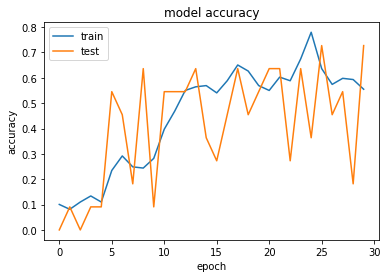

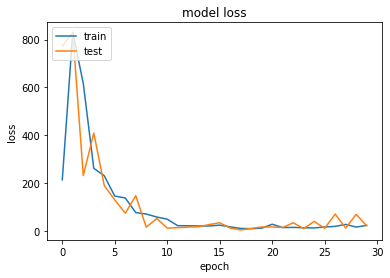

In [ ]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test)#.ravel()
# y_test1=y_test.argmax(axis=1)
# y_pred_keras1=y_pred_keras.argmax(axis=1)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test.argmax(axis=1), y_pred_keras.argmax(axis=1))
y_test.argmax(axis=1), y_pred_keras.argmax(axis=1)

In [ ]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# extraction

In [ ]:
!pip install git+git://github.com/PnS2019/pnslib.git

  Cloning git://github.com/PnS2019/pnslib.git to /tmp/pip-req-build-8xkkmshx
  Running command git clone -q git://github.com/PnS2019/pnslib.git /tmp/pip-req-build-8xkkmshx
  Created wheel for pnslib: filename=pnslib-0.1.0a1-cp36-none-any.whl size=1489618 sha256=0586e8132ceae739c03eec91a711f52e8e8fa2e572af0ca8c9f38f306bcfc6c3
  Stored in directory: /tmp/pip-ephem-wheel-cache-iqhe91o4/wheels/a2/8e/a9/c62e72840009deaa723b3a113d5c3b90acac77098d16e90eca
Successfully built pnslib


In [ ]:
import cv2
import numpy as np
import glob
import pickle
from pnslib import utils

eye_cascade = cv2.CascadeClassifier(utils.get_haarcascade_path('haarcascade_eye.xml'))
eye_num_2=0

def transform_image(img,threshold):    
    retval, threshold = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
    opening    = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel)
    closing    = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, kernel)
    open_close = cv2.bitwise_or(opening, closing, mask = None)
    return open_close,opening,closing

imgs = []
label=0
final_output = []
lables = []
eye_detected = []
iris_eye_detected=[]
#'''
#'''
for filepath in glob.iglob('CASIA-Iris-Thousand/*'):
    num_in_folder=0
    for filefilepath in glob.iglob(filepath+'/L/*'):
      if filefilepath[-1] == 'g':
        img	= cv2.imread(filefilepath)
        img=cv2.resize(img,(200,150))
        img	=	cv2.cvtColor(img,	cv2.COLOR_BGR2GRAY)
        imgs.append([img,num_in_folder,label,img])
        print(filefilepath)
        num_in_folder = num_in_folder+1

    #'''
    for filefilepath in glob.iglob(filepath+'/R/*'):
      if filefilepath[-1] == 'g':    
        img	= cv2.imread(filefilepath)
        img=cv2.resize(img,(400,300))
        img	=	cv2.cvtColor(img,	cv2.COLOR_BGR2GRAY)
        imgs.append([img,num_in_folder,label,img])
        print(filefilepath)
        num_in_folder = num_in_folder+1
     #'''       
    label=label+1
        #print(filefilepath)
#'''

print("total images number ",len(imgs))


CASIA-Iris-Thousand/003/L/S5003L09.jpg
CASIA-Iris-Thousand/003/L/S5003L02.jpg
CASIA-Iris-Thousand/003/L/S5003L08.jpg
CASIA-Iris-Thousand/003/L/S5003L04.jpg
CASIA-Iris-Thousand/003/L/S5003L00.jpg
CASIA-Iris-Thousand/003/L/S5003L07.jpg
CASIA-Iris-Thousand/003/L/S5003L03.jpg
CASIA-Iris-Thousand/003/L/S5003L01.jpg
CASIA-Iris-Thousand/003/L/S5003L05.jpg
CASIA-Iris-Thousand/003/L/S5003L06.jpg
CASIA-Iris-Thousand/003/R/S5003R00.jpg
CASIA-Iris-Thousand/003/R/S5003R01.jpg
CASIA-Iris-Thousand/003/R/S5003R05.jpg
CASIA-Iris-Thousand/003/R/S5003R03.jpg
CASIA-Iris-Thousand/003/R/S5003R09.jpg
CASIA-Iris-Thousand/003/R/S5003R02.jpg
CASIA-Iris-Thousand/003/R/S5003R08.jpg
CASIA-Iris-Thousand/003/R/S5003R07.jpg
CASIA-Iris-Thousand/003/R/S5003R04.jpg
CASIA-Iris-Thousand/003/R/S5003R06.jpg
CASIA-Iris-Thousand/007/L/S5007L09.jpg
CASIA-Iris-Thousand/007/L/S5007L03.jpg
CASIA-Iris-Thousand/007/L/S5007L02.jpg
CASIA-Iris-Thousand/007/L/S5007L00.jpg
CASIA-Iris-Thousand/007/L/S5007L08.jpg
CASIA-Iris-Thousand/007/L

In [ ]:
len(imgs[0])

4

In [ ]:
import os
os.mkdir('eyes')
#'''
eyes_num=0
for i,j,L,c in imgs:
  # cv2.imshow('dd',i)
  i=cv2.resize(i,(400,300))
  eyes = eye_cascade.detectMultiScale(i, 1.01, 0)
  if len(eyes)>1:
    eye_detected.append(imgs[eyes_num])
    print(eyes_num)
    eyes_num = eyes_num+1
    maxium_area = -3
    for (ex,ey,ew,eh) in eyes:
      area = ew*eh
      if area>maxium_area:
        maxium_area = area
        maxium_width=ew
        point_x=ex
        point_y=ey
        maxium_height = eh

    cv2.rectangle(i,(point_x,point_y),(point_x+maxium_width,+maxium_height),(255,0,0),2)
    cv2.imwrite('eyes/'+str(L)+'.'+str(j)+'.jpg',i)
    #cv2.imwrite('paper/threshold/'+str(L)+'.'+str(j)+'.jpg',working_img)
    #roi_gray = gray[y:y+h, x:x+w]
    #roi_gray = gray[ey:ey+eh, ex:ex+ew]
    #roi_color = img[ey:ey+eh, ex:ex+ew]


print("total_eyes_found = ",eyes_num)
print("total_eyes_found 2 = ",eye_num_2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
total_eyes_found =  220
total_eyes_found 2 =  0


In [ ]:
os.mkdir('iris')

iris_num=0
for i,j,L,c in eye_detected:
  circles = cv2.HoughCircles(i, cv2.HOUGH_GRADIENT, 10, 100)
  if circles is not None :
    circles = np.round(circles[0, :]).astype("int")
    #print(len(circles))
    #print(y)
    maxiumum_average=10000000000000
    #print(len(circles))
    print(i.shape[0])
    print(i.shape[1])
    print(min(i.shape))
    key=True

    for (x, y, r) in circles:
      if x+r<=max(i.shape) and y+r<=max(i.shape)and x-r>0 and y-r>0 and r>20:
        key=False
        new_roi = i[y-r:y+r, x-r:x+r]
        average = np.average(new_roi)
        if average < maxiumum_average:
          maxiumum_r = r
          point_x=x
          point_y=y
          maxiumum_average=average  
        #cv2.circle(i, (x, y), r, (0, 0, 0), 4)

    if key:
      #print("key opened")
      for (x, y, r) in circles:
        maxiumu_raduis=-4
        if r > maxiumu_raduis:
          maxiumum_r = r
          point_x=x
          point_y=y
          #maxiumum_average=average
                      
    cv2.circle(i, (point_x, point_y), maxiumum_r, (255, 255, 0), 4)
    #print(str(L)+'.'+str(j)+"  =  "+str(average))
    #cv2.circle(i, (point_x_medium, point_y_medium), raduis_medium , (255, 255, 0), 4)
    cv2.imwrite('iris/'+str(L)+'.'+str(j)+'.jpg',i)
    iris_eye_detected.append(eye_detected[iris_num])
    print(iris_num)
    iris_num = iris_num+1
    #roi_gray = gray[y:y+h, x:x+w]
    #roi_gray = gray[ey:ey+eh, ex:ex+ew]
    #roi_color = img[ey:ey+eh, ex:ex+ew]


print("total_iris_found = ",iris_num)
print("total images number ",len(imgs))
imgs= iris_eye_detected

150
200
150
0
150
200
150
1
150
200
150
2
150
200
150
3
150
200
150
4
150
200
150
5
150
200
150
6
150
200
150
7
150
200
150
8
150
200
150
9
300
400
300
10
300
400
300
11
300
400
300
12
300
400
300
13
300
400
300
14
300
400
300
15
300
400
300
16
300
400
300
17
300
400
300
18
300
400
300
19
150
200
150
20
150
200
150
21
150
200
150
22
150
200
150
23
150
200
150
24
150
200
150
25
150
200
150
26
150
200
150
27
150
200
150
28
150
200
150
29
300
400
300
30
300
400
300
31
300
400
300
32
300
400
300
33
300
400
300
34
300
400
300
35
300
400
300
36
300
400
300
37
300
400
300
38
300
400
300
39
150
200
150
40
150
200
150
41
150
200
150
42
150
200
150
43
150
200
150
44
150
200
150
45
150
200
150
46
150
200
150
47
150
200
150
48
150
200
150
49
300
400
300
50
300
400
300
51
300
400
300
52
300
400
300
53
300
400
300
54
300
400
300
55
300
400
300
56
300
400
300
57
300
400
300
58
300
400
300
59
150
200
150
60
150
200
150
61
150
200
150
62
150
200
150
63
150
200
150
64
150
200
150
65
150
200
150
66
150
2

In [ ]:
os.mkdir('threshold')
os.mkdir('opening')
os.mkdir('closing')
os.mkdir('contour')
os.mkdir('edging_5')
os.mkdir('final_casia')

kernel = np.ones((5,5),np.uint8)
import random
random.shuffle(imgs)
test=[]
for i,j,L,c in imgs:
  gold,siver,diamond = transform_image(i,0)
  golden_refrence = sum(sum(gold))
  #print("golden refrence  = "+str(golden_refrence))
  found = True

  for k in range(10,10000,10):
    working_img,opening,closing = transform_image(i,k)
    suming = sum(sum(working_img))
    diffrence = suming-golden_refrence
    if diffrence>800:
      found = False
      print("the image threshold = " ,k)
      print("the image name " +str(j))
      print(" " )
      cv2.imwrite('threshold/'+str(L)+'.'+str(j)+'.jpg',working_img)
      cv2.imwrite('opening/'+str(L)+'.'+str(j)+'.jpg',opening)
      cv2.imwrite('closing/'+str(L)+'.'+str(j)+'.jpg',closing)
      contours,_ = cv2.findContours(working_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

      for z in contours:
        x,y,w,h = cv2.boundingRect(z)
        if x+w<150 and y+h<200 and x-w//4>0:
          cv2.rectangle(working_img,(x,y),(x+w,y+h),(0,255,0),-2)
          cv2.imwrite('contour/'+str(L)+'.'+str(j)+'.jpg',working_img)
              
      contours_2,_ = cv2.findContours(working_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
      #cv2.imwrite('paper/contour/'+str(L)+'.'+str(j)+'.jpg',contours_2)  
      maxium_area=0
      maxium_area = 0
      maxium_width=0
      point_x=0
      point_y=0
      maxium_height = 0
      for z in contours_2:
        #print(len(i))
        x,y,w,h = cv2.boundingRect(z)
        new_area=h*w
        if x+w<150 and y+h<200 and new_area>maxium_area and x-w//4>0:
          maxium_area = new_area
          maxium_width=w
          point_x=x
          point_y=y
          maxium_height = h
      
      #cv2.rectangle(working_img,(x,y),(x+w,y+h),(0,255,0),-2)  
      #cv2.rectangle(i,(point_x,point_y),(point_x+maxium_width,point_y+maxium_height),(0,255,0),-2)

      center_x = point_x+maxium_width//2
      center_y = point_y+maxium_height//2
      radius = 40

      if center_y-radius>0 and center_x-radius >0  and center_y+radius < 200 and center_x+radius < 150:
        #cv2.circle(c, (int(center_x), int(center_y)), int(radius),  (0, 255, 255), 2)
        new_roi = c[center_y-radius:center_y+radius, center_x-radius:center_x+radius]
        new_roi=cv2.resize(new_roi,(200,150))
        #new_roi	= cv2.cvtColor(new_roi,cv2.COLOR_GRAY2BGR)

        #cv2.imwrite('paper/threshold/'+str(L)+'.'+str(j)+'.jpg',new_roi)
        cv2.imwrite('final_casia/'+str(L)+'.'+str(j)+'.jpg',new_roi)

      #new_roi=cv2.resize(new_roi,(200,150))
      else:
        center_y=c.shape[0]//2
        center_x=c.shape[1]//2
        new_roi = c[center_y-radius:center_y+radius, center_x-radius:center_x+radius]
        new_roi =cv2.resize(new_roi,(200,150))
        #new_roi = cv2.cvtColor(new_roi,cv2.COLOR_GRAY2BGR)

        cv2.imwrite('final_casia/'+str(L)+'.'+str(j)+'.jpg',new_roi)

      cv2.imwrite('edging_5/'+str(L)+'_'+str(j)+'.jpg',i)
      test.append(i)
      final_output.append(new_roi)
      lables.append(L)

  if  found :
    i =cv2.resize(i,(200,150))
    #i = cv2.cvtColor(i,cv2.COLOR_GRAY2BGR)
    #cv2.imwrite('final_iris2/'+str(j[29:]),i)
    cv2.imwrite('final_casia/'+str(L)+'.'+str(j)+'.jpg',new_roi)
    #cv2.imwrite('edging_5_test/'+str(j[5:]),i)
    #break

print("the lenght of final output = ",len(final_output))
print("the of lables = ",len(lables))

Streaming output truncated to the last 5000 lines.
the image name 5
 
the image threshold =  140
the image name 5
 
the image threshold =  30
the image name 2
 
the image threshold =  40
the image name 2
 
the image threshold =  50
the image name 2
 
the image threshold =  60
the image name 2
 
the image threshold =  70
the image name 2
 
the image threshold =  80
the image name 2
 
the image threshold =  90
the image name 2
 
the image threshold =  100
the image name 2
 
the image threshold =  110
the image name 2
 
the image threshold =  120
the image name 2
 
the image threshold =  130
the image name 2
 
the image threshold =  140
the image name 2
 
the image threshold =  150
the image name 2
 
the image threshold =  160
the image name 2
 
the image threshold =  170
the image name 2
 
the image threshold =  180
the image name 2
 
the image threshold =  190
the image name 2
 
the image threshold =  200
the image name 2
 
the image threshold =  210
the image name 2
 
the image thresho